Complete Notebook for ingesting News articles Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('../Dataset/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


HuffPost News Category Dataset is a collection of 13,000 news articles from HuffPost.com.
> Typical json file has a single object which contains entire dataset. <br> But this is a NDJSON -> JSON Lines file, where each line is a separate JSON object.

In [30]:
# data = pd.read_json('../Dataset/News_Category_Dataset_v3.json') ## Will give error
data = pd.read_json('../Dataset/News_Category_Dataset_v3.json', lines=True)
data

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [31]:
# ## Function to load articles text
# import requests
# from bs4 import BeautifulSoup
# from tqdm import tqdm
# import time
# import random

# BATCH_SIZE = 1000
# starting = 0

# SAVE_PATH = "../Dataset/huffpost_articles_scraped.csv"

# if os.path.exists(SAVE_PATH):
#     scraped_df = pd.read_csv(SAVE_PATH)
#     done_links = set(scraped_df["link"])
#     print(f"Found {len(done_links)} links already done")
# else:
#     scraped_df = pd.DataFrame(columns = data.columns.tolist() + ["article_text"])
#     done_links = set()

# remaining_df = data[~data["link"].isin(done_links)].reset_index(drop=True)
# print(f"Remaining {len(remaining_df)} links to scrape")

# # ==================================
# # Web Scraping Functions
# # ==================================
# def get_article_text(url, max_retries=3, sleep_range=(1, 3)):
#     """Fetch article body text from a HuffPost URL"""
#     if not isinstance(url, str) or not url.startswith("http"):
#         return None

#     for _ in range(max_retries):
#         try:
#             headers = {
#                 "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
#                               "AppleWebKit/537.36 (KHTML, like Gecko) "
#                               "Chrome/118.0.0.0 Safari/537.36"
#             }
#             resp = requests.get(url, headers=headers, timeout=8)
#             if resp.status_code != 200:
#                 time.sleep(random.uniform(*sleep_range))
#                 continue

#             soup = BeautifulSoup(resp.text, 'html.parser')
#             paragraphs = soup.find_all('p')
#             text = " ".join(p.get_text(strip=True) for p in paragraphs)
#             text = text.strip()

#             if len(text) < 100:  # skip junk pages
#                 return None
#             return text

#         except Exception:
#             print(f"Error fetching {url}")
#             # time.sleep(random.uniform(*sleep_range))
#     return None

In [32]:
# # ===========================
# # 4️⃣ Batch Processing Loop
# # ===========================
# total_batches = len(remaining_df) // BATCH_SIZE + 1

# for batch_idx in range(total_batches):
#     start = batch_idx * BATCH_SIZE
#     end = min((batch_idx + 1) * BATCH_SIZE, len(remaining_df))
#     batch_df = remaining_df.iloc[start:end].copy()
#     print(f"\n📦 Batch {batch_idx+1}/{total_batches} | Rows {start}–{end}")

#     texts = []
#     for url in tqdm(batch_df['link'], desc=f"Scraping batch {batch_idx+1}", ncols=100):
#         text = get_article_text(url)
#         texts.append(text)
#         time.sleep(random.uniform(1, 2))  # polite delay

#     batch_df['article_text'] = texts

#     # Filter empty ones
#     batch_df = batch_df.dropna(subset=['article_text'])
#     print(f"✅ Scraped {len(batch_df)} valid articles in this batch.")

#     # Append to saved file (resume-friendly)
#     if not batch_df.empty:
#         if not os.path.exists(SAVE_PATH):
#             batch_df.to_csv(SAVE_PATH, index=False)
#         else:
#             batch_df.to_csv(SAVE_PATH, mode='a', header=False, index=False)

#     # Save a checkpoint after each batch
#     print(f"💾 Progress saved. Total collected so far: {len(pd.read_csv(SAVE_PATH))}")

#     # Random cooldown after batch
#     # time.sleep(random.uniform(10, 20))

# print("🎉 All batches completed!")

First, we will work with BBC Complete Articles datasets

Right IQR limit: 4836 2163


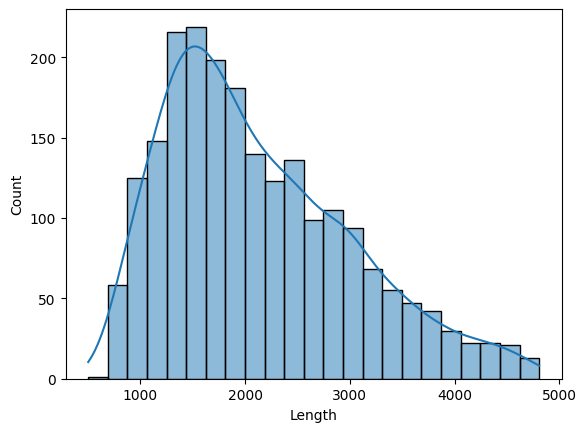

In [39]:
df['Length'] = df['text'].str.len()
# 1) Remove outliers
iqr = df['Length'].quantile(0.75) - df['Length'].quantile(0.25)
limit = df['Length'].quantile(0.75) + 1.5 * iqr
print("Right IQR limit:", int(limit), sum(df['Length'] <= limit))
df = df[df['Length'] <= int(limit)]

sns.histplot(data=df, x='Length', kde=True)
plt.show()

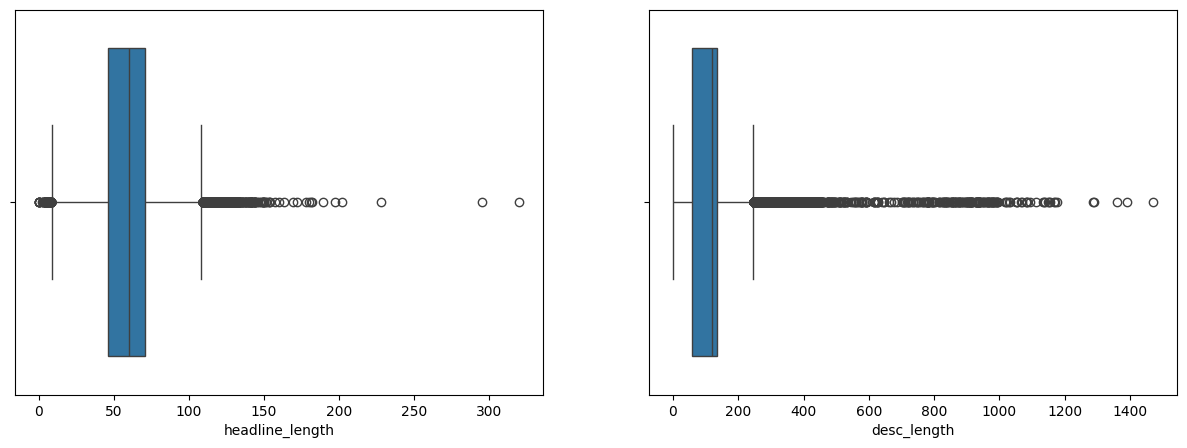

In [34]:
data['headline_length'] = data['headline'].str.len()
data['desc_length'] = data['short_description'].str.len()

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# sns.histplot(data=data, x='headline_length', ax=ax[0], kde=True)
sns.boxplot(data=data, x='headline_length', ax=ax[0])

# sns.histplot(data=data, x='desc_length', ax=ax[1], kde=True)
sns.boxplot(data=data, x='desc_length', ax=ax[1])
plt.show()

Now, we work with MN-DS dataset

In [2]:
mnbc_df = pd.read_excel('../Dataset/MN-DS-news-classification.xlsx')
# Rem
mnbc_df.head(2)

,date,source,title,content,author,url,category_level_1,category_level_2,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,43769,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"crime, law and justice",crime,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43776,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"crime, law and justice",crime,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 1) Remove all error columns
columns = mnbc_df.columns
columns = [col for col in columns if 'Unnamed' not in col]
Data = mnbc_df[columns]

# 2) Remove missing contents
Data = Data.dropna(subset=['content', 'category_level_1', 'category_level_2'], how='any')

Data['Length'] = Data['content'].str.len()
Data

,date,source,title,content,author,url,category_level_1,category_level_2,Length
0,43769,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"crime, law and justice",crime,785
1,43776,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"crime, law and justice",crime,4260
2,43776,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"crime, law and justice",crime,750
3,43801,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"crime, law and justice",crime,674
4,43567,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,"crime, law and justice",crime,2855
...,...,...,...,...,...,...,...,...,...
14941,43814,therussophileorg,"Iran to build over 30,000 housing units in Syr...",This post was originally published on this sit...,News Desk,https://www.therussophile.org/iran-to-build-ov...,"conflict, war and peace",post-war reconstruction,1463
14942,43750,therussophileorg,Ukraine has no money for reconstruction of Don...,This post was originally published on this sit...,Michael Sullivan,https://www.therussophile.org/ukraine-has-no-m...,"conflict, war and peace",post-war reconstruction,557
14943,43652,therussophileorg,Iran’s contribution is needed to rebuild Iraq ...,This&#10;&#10;[post](http://www.presstv.ir/Det...,Michael Sullivan,https://www.therussophile.org/irans-contributi...,"conflict, war and peace",post-war reconstruction,2186
14944,43733,therussophileorg,Iraqi president demands international help for...,This&#10;&#10;[post](http://www.presstv.ir/Det...,Michael Sullivan,https://www.therussophile.org/iraqi-president-...,"conflict, war and peace",post-war reconstruction,1783


There are a lot of invalid entires with weird categories. We need to remove them.

In [37]:
# 3) Removing invalid entires
unq = Data['category_level_1'].value_counts()
unq = unq[unq > 10]
Data = Data[Data['category_level_1'].isin(unq.index)]
Data

,date,source,title,content,author,url,category_level_1,category_level_2,Length
0,43769,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"crime, law and justice",crime,761
1,43776,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"crime, law and justice",crime,4108
2,43776,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"crime, law and justice",crime,718
3,43801,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"crime, law and justice",crime,642
4,43567,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,"crime, law and justice",crime,2743
...,...,...,...,...,...,...,...,...,...
14941,43814,therussophileorg,"Iran to build over 30,000 housing units in Syr...",This post was originally published on this sit...,News Desk,https://www.therussophile.org/iran-to-build-ov...,"conflict, war and peace",post-war reconstruction,1423
14942,43750,therussophileorg,Ukraine has no money for reconstruction of Don...,This post was originally published on this sit...,Michael Sullivan,https://www.therussophile.org/ukraine-has-no-m...,"conflict, war and peace",post-war reconstruction,533
14943,43652,therussophileorg,Iran’s contribution is needed to rebuild Iraq ...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/irans-contributi...,"conflict, war and peace",post-war reconstruction,1998
14944,43733,therussophileorg,Iraqi president demands international help for...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/iraqi-president-...,"conflict, war and peace",post-war reconstruction,1631


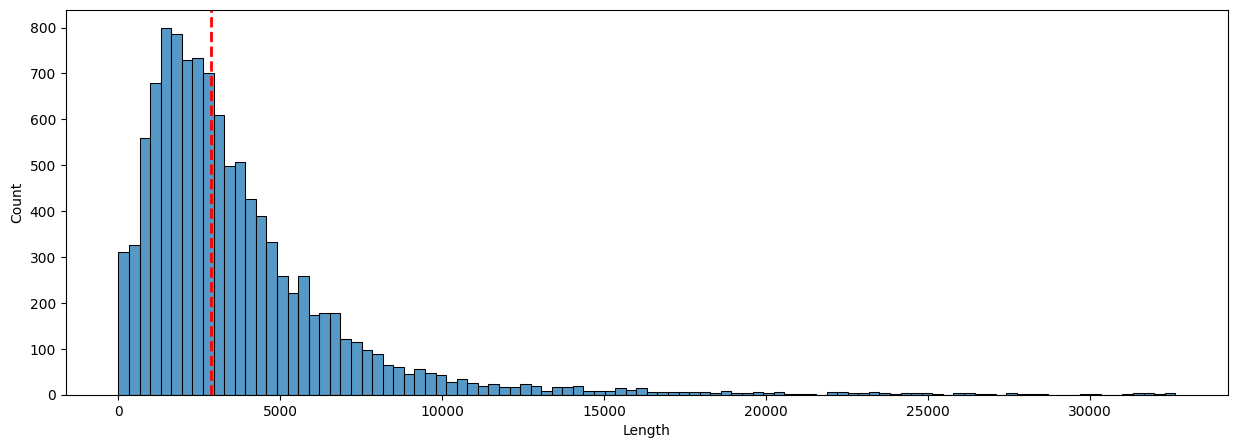

In [38]:
plt.figure(figsize=(15, 5))
sns.histplot(data=Data, x='Length', bins=100)

plt.axvline(Data['Length'].median(), color='r', linestyle='dashed', linewidth=2)
plt.show()